## ADA Portfolio

In [ ]:
# Enable intellisence
%config IPCompleter.greedy=True


## 1.	Acquisition

In [ ]:
## load libraries for the tasks

## for data wrangling
import pandas as pd
import numpy as np
import json
import dateutil

## for visualisation
import matplotlib.pylab as plt
import seaborn as sns

## for word processing
import nltk


## show data without truncating
## omit scientific notation

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [6]:
## This section contains all helper functions for data wrangling acitivities

def read_data(filename='arxiv-metadata-oai-snapshot.json'):
    '''
    Function to perform following tasks 
    - ingest a json file into data frame, line by line
    - print a sample of the data
    - verify the size of the data 
    
    param
    ----------

    filename:  name of json file, default to 'arxiv-metadata-oai-snapshot.json'
    
    return
    ------
    a pandas dataframe

    '''

    file = filename
    
    metadata  = []
    with open(file, 'r') as f:
        for line in f:
            metadata.append(json.loads(line))

    # converting it to pandas data frame / rows and columns structure
    metadata = pd.DataFrame(metadata)
    print(f'There are {metadata.shape[0]:,} rows and {metadata.shape[1]} columns.')
    return metadata

def create_csv(df_temp):
    '''
    Create a new csv contains only comments and non COVID in title
    
    param
    ----------
    df_temp:  a data frame to subset data from
    
    return
    ------
    a pandas dataframe

    '''
    
    ## Make a copy of the input and manipulate it from a copied instance
    df = df_temp.copy()

    ## Select 5 columns to work with
    cols = ['id','title', 'comments', 'journal-ref', 'categories']
    df = df[cols]

    ## Make a derived column, change to lowercase
    ## This prepares the data for the next operation - filtered by criteria
    df['title2'] = df.title.str.lower()


    ## Filter criteria:
    ## 1: Must not be covid related in the title
    ## 2: Exclude blank comments

    df = df[~df.title2.str.contains('covid')]
    df = df[~df.comments.isna()]
    print(f'comments na {len(df[df.comments.isna()])}')
    df = df[~df.comments.isnull()]
    print(f'comments null {len(df[df.comments.isnull()])}')

    ## create variables object for data validation, then print
    print(f'Total records of non COVID and with comments: {len(df)}')

    # drop column as no longer required
    df.drop('title2', axis=1, inplace=True)

    # create csv

    df.to_csv("clean_df.csv")
    print(f'Total number of {len(df)} rows are exported to a csv file called clean_df.csv in the current directory.')

    return df 

def explore_df(df):
    '''
    Check if there are any missing data
    
    '''
    print(f'There are {df.shape[0]:,} rows and {df.shape[1]} columns.')
    print(f'Does the dataset contain any missing data:\n {df.isnull().values.any()}')
    print(f'Total records with missing data: {df.isnull().sum()}')

    print('-----Print info-------')
    print(df.info())

    print('-----Object info-------')
    print(type(df))

def check_dup(var, keep=True):
    '''
    Check duplicated records
    
    '''
    var_name = var.unique()

    if var.is_unique:
        print(f'Variable {var_name} has no duplicated records.')
    else:
        print(f'Variable {var_name} has duplicated records.')
        cnt = len(df[df.duplicated(var)])
        print(f'Total duplicated records: {cnt}')
        print(df[df.duplicated(var,keep=True)])
        return df

def plot_histogram(var, plot_title):
    '''
    histogram to explore global characteristics

    '''
    sns.histplot(var).set(title=plot_title);
    

def univariate_analysis(df):
    '''
    Investigate how our data is distributed
    for example, calculated the word frequency 
    '''
    pass

def remove_whitespace(df_temp, var):
    '''
    Remove whitespace in text column

    '''
    df = df_temp.copy()
    df[var] = df[var].str.replace(" ", "")
    return df[var]

def remove_trail(df_temp, var):
    '''
    Remove / trimming in text column

    '''
    df = df_temp.copy()

    df[var] = df[var].str.strip()
    return df[var]

def remove_newline(df_temp, var):
    '''
    Remove newline

    '''
    df = df_temp.copy()
    df[var] = df[var].str.replace('\n','')
    
    return df[var]

def remove_quotes(df_temp, var):
    '''
    Remove quotes

    '''
    df = df_temp.copy()
    df[var] = df[var].str.replace('"','')
    
    return df[var]


###############################################################
## Natural Language Processing helper functions ###############



In [ ]:
# estimate running time ~ 2mins
file = r"C:\Users\NHaswell\arxiv-metadata-oai-snapshot.json"
metadata = read_data(file)

In [ ]:
create_csv(metadata)

In [ ]:
# Create a new CSV file excluding blank comments and COVID related in title
cols = ['id','title', 'comments', 'journal-ref', 'categories']
df = metadata[cols]

## Make a derived column, change to lowercase
## This prepares the data for the next operation - filtered by criteria
df['title2'] = df.title.str.lower()

## Filter criteria:
## 1: Must not be covid related in the title
## 2: Exclude blank comments

df = df[~df.title2.str.contains('covid')]
df = df[~df.comments.isna()]
df = df[~df.comments.isnull()] 

## create variables object for data validation, then print
print(f'Total records of non COVID and with comments: {len(df)}')

# drop column as no longer required
df.drop('title2', axis=1, inplace=True)

# create csv
df.to_csv("clean_df.csv")
print(f'Total number of {len(df)} rows are exported to a csv file called clean_df.csv in the current directory.')

## 2.	Storage

## 3.	Analysis


In [4]:
## read data from csv
## estimate 6 secs to run
df = pd.read_csv("clean_df.csv", index_col=0, low_memory=False)


In [7]:
## health check
explore_df(df)

There are 1,598,729 rows and 5 columns.
Does the dataset contain any missing data:
 True
Total records with missing data: id             0     
title          0     
comments       26    
journal-ref    948398
categories     0     
dtype: int64
-----Print info-------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1598729 entries, 0 to 2061366
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   id           1598729 non-null  object
 1   title        1598729 non-null  object
 2   comments     1598703 non-null  object
 3   journal-ref  650331 non-null   object
 4   categories   1598729 non-null  object
dtypes: object(5)
memory usage: 73.2+ MB
None
-----Object info-------
<class 'pandas.core.frame.DataFrame'>


In [8]:
df.head(4)

,id,title,comments,journal-ref,categories
0,0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph
1,0704.0002,Sparsity-certifying Graph Decompositions,To appear in Graphs and Combinatorics,NaN,math.CO cs.CG
2,0704.0003,The evolution of the Earth-Moon system based on the dark matter field\n fluid model,"23 pages, 3 figures",NaN,physics.gen-ph
3,0704.0004,A determinant of Stirling cycle numbers counts unlabeled acyclic\n single-source automata,11 pages,NaN,math.CO


In [9]:
df.tail(4)

,id,title,comments,journal-ref,categories
2061363,supr-con/9609001,Nonlinear Response of HTSC Thin Film Microwave Resonators in an Applied\n DC Magnetic Field,"4 pages, LaTeX type, Uses IEEE style files, 600 dpi PostScript file\n with color figures available at http://sagar.physics.neu.edu/preprints.html\n Submitted to IEEE Transactions on Applied Superconductivity",NaN,supr-con cond-mat.supr-con
2061364,supr-con/9609002,Critical State Flux Penetration and Linear Microwave Vortex Response in\n YBa_2Cu_3O_{7-x} Films,"20 pages, LaTeX type, Uses REVTeX style files, Submitted to Physical\n Review B, 600 dpi PostScript file with high resolution figures available at\n http://sagar.physics.neu.edu/preprints.html",NaN,supr-con cond-mat.supr-con
2061365,supr-con/9609003,Density of States and NMR Relaxation Rate in Anisotropic\n Superconductivity with Intersecting Line Nodes,"7 pages, 4 PostScript Figures, LaTeX, to appear in J. Phys. Soc. Jpn",NaN,supr-con cond-mat.supr-con
2061366,supr-con/9609004,Ginzburg Landau theory for d-wave pairing and fourfold symmetric vortex\n core structure,"12 pages including 8 eps figs, LaTeX with jpsj.sty & epsfig","J. Phys. Soc. Jpn. 66, 204 (1997).",supr-con cond-mat.supr-con


In [10]:
for col in df.columns:
    ## Exploring how big each column is by usig min / max
    print(f'{col} min lenght is {df[col].str.len().min()}')
    print(f'{col} max lenght is {df[col].str.len().max()}')


id min lenght is 9
id max lenght is 16
title min lenght is 2
title max lenght is 382
comments min lenght is 1.0
comments max lenght is 1150.0
journal-ref min lenght is 4.0
journal-ref max lenght is 557.0
categories min lenght is 5
categories max lenght is 125


In [11]:
# validation
df[(df.title.str.len() ==2)].tail(5)

,id,title,comments,journal-ref,categories
2001603,nlin/0309030,Q4,"24 pages, LaTeX","Internat. Math. Research Notices, 2004, Nr. 47, 2523-2553",nlin.SI


In [12]:
# validation
df[(df.comments.str.len() ==1)].tail(5)

,id,title,comments,journal-ref,categories
2029487,physics/0509244,Comment on Unified treatment for two-center one-electron molecular\n integrals over Slater-type orbitals with integer and noninteger principal\n quantum numbers,4,NaN,physics.chem-ph
2030344,physics/0601026,Comment on Cartesian expressions for surface and regular solid spherical\n harmonics using binomial coefficients and its use in the evaluation of\n multicenter integrals,2,NaN,physics.chem-ph physics.comp-ph
2031768,physics/0607008,Superfluid Pairing in the Three Component Fermi Gas,4,NaN,physics.atom-ph
2048994,quant-ph/0408042,Tunnelling Through Two Barriers,4,NaN,quant-ph
2054676,quant-ph/0608093,A gauge theory of quantum mechanics,9,"Mod.Phys.Lett.A22:191-200,2007",quant-ph math-ph math.MP


In [13]:
# Remove redundant values
df = df.drop_duplicates()
print(f'There are {df.shape[0]:,} rows.')    

There are 1,598,728 rows.


In [14]:
for col in df.columns:
    if df[col].is_unique:
        print(f' {col} has no duplicated records.' )
    else:
        print(f' {col} has duplicated records.' )

 id has duplicated records.
 title has duplicated records.
 comments has duplicated records.
 journal-ref has duplicated records.
 categories has duplicated records.


In [15]:
## Create a new dataframe to find relationship between journal-ref and category

df_ref_cat = df[~df['journal-ref'].isna()][['id','journal-ref','categories']]
print(f'There are {len(df_ref_cat):,} records in this dataset.')
df_ref_cat.head(3)

There are 650,330 records in this dataset.


,id,journal-ref,categories
0,0704.0001,"Phys.Rev.D76:013009,2007",hep-ph
6,0704.0007,"Phys.Rev.D76:044016,2007",gr-qc
7,0704.0008,"Journal of Applied Physics, vol 104, 073536 (2008)",cond-mat.mtrl-sci


In [16]:
## Investigate duplcated records by grouping by ID
df_ref_cat.groupby('id').size().sort_values(ascending=False)

id
math-ph/0409039     2
math-ph/0408005     2
math-ph/0212014     2
0704.0001           1
astro-ph/0007397    1
                   ..
1502.03499          1
1502.03506          1
1502.03509          1
1502.03510          1
supr-con/9609004    1
Length: 650327, dtype: int64

In [17]:
dup_list = ['math-ph/0207039','math-ph/0409039', 'math-ph/0408005', 'math-ph/0212014' ]

df_ref_cat[df_ref_cat['id'].isin(dup_list)].sort_values(by='id')


,id,journal-ref,categories
1944740,math-ph/0207039,"Math. Nachr. 274-275 (2004), pages 117 - 129",math-ph gr-qc math.MP
1945017,math-ph/0212014,"J. Phys. A, 40 (2007) F1047-F1052 [revised version, open access]",math-ph math.MP quant-ph
1998270,math-ph/0212014,"J. Phys. A, 40 (2007) F1047-F1052",math-ph math.MP math.SG quant-ph
1946319,math-ph/0408005,Progress in Mathematics 232 (2005) 75-120 [revised version],math-ph math.MP
1998271,math-ph/0408005,Progress in Mathematics 232 (2005) 75-120 [revised version],math-ph math.MP math.SG
1946414,math-ph/0409039,"J. Phys. A, 38 (2005) 1977-2004 [revised version, changed title]",math-ph math.MP
1998272,math-ph/0409039,"J. Phys. A, 38 (2005) 1977-2004 [revised version, changed title]",math-ph math.MP math.SG


In [18]:
df_ref_cat.drop_duplicates(inplace=True)
print(f'There are {len(df_ref_cat):,} records in this dataset.')
df_ref_cat[df_ref_cat['id']=="math-ph/0409039"][['id', 'journal-ref']].drop_duplicates()

There are 650,330 records in this dataset.


,id,journal-ref
1946414,math-ph/0409039,"J. Phys. A, 38 (2005) 1977-2004 [revised version, changed title]"


In [19]:
# normalise structure of the dataframe
df_journal = df_ref_cat[['id', 'journal-ref']].drop_duplicates()
print(f'There are {len(df_journal):,} records in this dataset.')


There are 650,328 records in this dataset.


In [20]:
# Check distinct value
df_journal[df_journal['id'].isin(dup_list)]

,id,journal-ref
1944740,math-ph/0207039,"Math. Nachr. 274-275 (2004), pages 117 - 129"
1945017,math-ph/0212014,"J. Phys. A, 40 (2007) F1047-F1052 [revised version, open access]"
1946319,math-ph/0408005,Progress in Mathematics 232 (2005) 75-120 [revised version]
1946414,math-ph/0409039,"J. Phys. A, 38 (2005) 1977-2004 [revised version, changed title]"
1998270,math-ph/0212014,"J. Phys. A, 40 (2007) F1047-F1052"


In [21]:
df_category = df_ref_cat[['id', 'categories']].drop_duplicates()
print(f'There are {len(df_category):,} records in this dataset.')

There are 650,330 records in this dataset.


Cleaning categories into long format, split by space delimeter

In [22]:
# create a new dataframe for category
# split the categories to multiple columns, one column per one category

cat = lambda x: f'Category{x+1}'
df_cat = (df_category.join(df_ref_cat['categories'].str.split(' ', expand=True)
                            .rename(columns=cat)
                            .fillna('')))

In [23]:
df_cat.tail(5)

,id,categories,Category1,Category2,Category3,Category4,Category5,Category6,Category7,Category8,Category9,Category10,Category11,Category12,Category13
2061355,supr-con/9608001,supr-con cond-mat.supr-con quant-ph,supr-con,cond-mat.supr-con,quant-ph,,,,,,,,,,
2061357,supr-con/9608003,supr-con cond-mat.supr-con,supr-con,cond-mat.supr-con,,,,,,,,,,,
2061358,supr-con/9608004,supr-con cond-mat.supr-con,supr-con,cond-mat.supr-con,,,,,,,,,,,
2061359,supr-con/9608005,supr-con cond-mat.supr-con,supr-con,cond-mat.supr-con,,,,,,,,,,,
2061366,supr-con/9609004,supr-con cond-mat.supr-con,supr-con,cond-mat.supr-con,,,,,,,,,,,


In [24]:
df_cat  = pd.melt(df_cat, id_vars=['id']).drop('variable', axis=1).dropna()
df_cat = df_cat.rename(columns={"value": "category"})
df_cat

,id,category
0,0704.0001,hep-ph
1,0704.0007,gr-qc
2,0704.0008,cond-mat.mtrl-sci
3,0704.0015,hep-th
4,0704.0016,hep-ph
...,...,...
9104615,supr-con/9608001,
9104616,supr-con/9608003,
9104617,supr-con/9608004,
9104618,supr-con/9608005,


In [25]:
## This ID seems to have lots of blank, lets check the original 
df_ref_cat[df_ref_cat['id']=="supr-con/9608001"]

,id,journal-ref,categories
2061355,supr-con/9608001,SIAM J Appl Math {\bf 58} (1998) 103--121,supr-con cond-mat.supr-con quant-ph


In [26]:
# Need to filter the original concatenanted categories and blank rows
df_cat[(df_cat['id']=="supr-con/9608001") & \
       (df_cat['category'].str.len()>0) & \
       (~df_cat['category'].str.contains(' '))]

,id,category
1300655,supr-con/9608001,supr-con
1950985,supr-con/9608001,cond-mat.supr-con
2601315,supr-con/9608001,quant-ph


In [27]:
## cleaned version of df_cat
## splitting column to multiple columns by whitespace delimiter

df_cat = df_cat[(df_cat['category'].str.len()>0) & \
       (~df_cat['category'].str.contains(' '))]

print(f'There are {len(df_cat):,} records in this dataset.')

There are 1,455,629 records in this dataset.


In [28]:
# merging journal and category datafames
df_category_journal = pd.merge(df_journal,df_cat,  on='id', how='left')[['id','journal-ref', 'category']].drop_duplicates()

In [29]:
# a new dataframe after merging journal and category datafames
df_category_journal.head(2)

,id,journal-ref,category
0,0704.0001,"Phys.Rev.D76:013009,2007",hep-ph
2,0704.0007,"Phys.Rev.D76:044016,2007",gr-qc


In [30]:
## Restructing dataframe via aggregating the data frame and count records
## assign to a new object df_group
df_group = df_category_journal.groupby(['journal-ref', 'category']).size()
df_group = pd.DataFrame(df_group).reset_index()
df_group.columns.values[2] = 'count'
df_group.sort_values(by='count', ascending=False)

,journal-ref,category,count
186096,"Dans Design, Automation and Test in Europe - DATE'05, Munich :\n Allemagne (2005)",cs.AR,84
186186,"Dans Symposium on Design, Test, Integration and Packaging of\n MEMS/MOEMS - DTIP 2008, Nice : France (2008)",cs.OH,77
186185,"Dans Symposium on Design, Test, Integration and Packaging of\n MEMS/MOEMS - DTIP 2007, Stresa, lago Maggiore : Italie (2007)",cs.OH,66
186183,"Dans Symposium on Design, Test, Integration and Packaging of\n MEMS/MOEMS - DTIP 2006, Stresa, Lago Maggiore : Italie (2006)",cs.OH,49
1008279,Prog Theor Exp Phys (2020),hep-ph,45
...,...,...,...
363758,"J. Pure Appl. Algebra 225 (2021), 106463",math.CO,1
363759,"J. Pure Appl. Algebra 225 (2021), 106463",math.RT,1
363760,"J. Pure Appl. Algebra 225 (2021), 106525, 10 pages",math.AG,1
363761,"J. Pure Appl. Algebra 225 (2021), no. 10, Paper No. 106665, 26 pp",math.AG,1


In [31]:
#df_group = df_group[df_group['count']>5]

In [32]:
## Orignal dataset filtered by MICCAI 2020 journal
## found 5 distinct documents and cs.CV was selected in all 5 papers
df[df['journal-ref']=="MICCAI 2020"]['categories']

1307525    eess.IV cs.CV      
1317014    cs.CV cs.LG eess.IV
1321183    eess.IV cs.CV      
1326103    cs.CV cs.LG stat.ML
1487328    cs.CV cs.AI stat.ML
Name: categories, dtype: object

In [33]:
## pivot dataset and assign it as df_category_journal_pv
## the purpose is to prepare data for pairwise correlation
## this will help us analyse relations between papers cited by diffeent categories

df_category_journal_pv = df_group.reset_index().pivot_table(index=['journal-ref'],columns=['category'],values='count')
df_category_journal_pv

category,acc-phys,adap-org,alg-geom,ao-sci,astro-ph,astro-ph.CO,astro-ph.EP,astro-ph.GA,astro-ph.HE,astro-ph.IM,...,q-fin.TR,quant-ph,solv-int,stat.AP,stat.CO,stat.ME,stat.ML,stat.OT,stat.TH,supr-con
journal-ref,,,,,,,,,,,,,,,,,,,,,
""" Coding and Cryptography,"" Proceedings of the First International\n Workshop, Wuyi Mountain, Fujian, China, 11 - 15 June 2007, edited by Yongqing\n Li et al., World Scientific, 2008, pp. 15--24",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
""" Trends in Materials Science Research"", B.M.Caruta Editor,Nova\n Science Publishers,New York,2006,pp.245-260",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
""".Astronomy: Networked Astronomy and the New Media"", 2009, edited\n by R.J. Simpson, D. Ward-Thompson",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""2008 Cosmology, Proceedings of the 43rd Rencontres de Moriond"",\n Eds. J. Dumarchez, Y. Giraud-Heraud, J. Tran Thanh Van, pp. 71-74, 2009, The\n Gioi Publishers, Vietnam",NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"""2010 Cosmology"", Ed.: Etienne Aug\'e, Jacques Dumarchez, Jean\n Tr\^an Thanh V\^an, Th\~e gi\'oi, 2010, pp. 177-180",NaN,NaN,NaN,NaN,NaN,1.00000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Épijournal de Géométrie Algébrique, Volume 6 (January 28, 2022)\n epiga:9011",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Épijournal de Géométrie Algébrique, Volume 6 (March 1, 2022)\n epiga:9149",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Épijournal de Géométrie Algébrique, Volume 6 (March 1, 2022)\n epiga:9150",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### relationship with journal ref and categories

In [34]:
## Construct a journal / category matrix. 
# Note how NaN indicates missing data - category without tagged papers

similarCategory = pd.DataFrame([])

for c in df_cat.category.unique():
    sim = pd.DataFrame(df_category_journal_pv.corrwith(df_category_journal_pv[c])\
             .dropna()).rename(columns={0:'correlation'}).reset_index()
    sim.insert(1,"category1", c)
    similarCategory = similarCategory.append(sim,ignore_index=True)


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [35]:
similarCategory.describe()

,correlation
count,1588.00000
mean,0.52182
std,0.41164
min,-1.00000
25%,0.13412
50%,0.56657
75%,1.00000
max,1.00000


In [36]:
## Compute the pairwise correlation of all categories
# After that, we'll drop any results that have no data
# and construct a new DataFrame of categories and their correlation score (similarity) by each pair of category
# Compute absolute value because we are interested in both positive and neative correlation

similarCategory['abs_val'] = round(abs(similarCategory['correlation']),2)
sims2 = similarCategory.copy()
#similarCategory[similarCategory['abs_val']=1.00]
sims2[(sims2['category']!=sims2['category1']) &(sims2['correlation'] <0.9) ].sort_values(by="correlation", ascending=False)

,category,category1,correlation,abs_val
1097,cs.SE,cs.PF,0.89469,0.89000
1142,cs.PF,cs.SE,0.89469,0.89000
457,cond-mat.stat-mech,physics.atom-ph,0.89400,0.89000
280,physics.atom-ph,cond-mat.stat-mech,0.89400,0.89000
331,quant-ph,nucl-ex,0.89329,0.89000
...,...,...,...,...
1114,cs.LG,cs.OH,-0.33333,0.33000
96,cond-mat.quant-gas,hep-ex,-0.38125,0.38000
1214,hep-ex,cond-mat.quant-gas,-0.38125,0.38000
680,cs.MM,cs.LO,-1.00000,1.00000


In [37]:
sims3 = sims2.groupby('category1').agg({'correlation': [np.size, np.mean]})
sims3


correlation        
                   size    mean
category1                      
astro-ph     4          0.80240
astro-ph.CO  19         0.51425
astro-ph.EP  9          0.38472
astro-ph.GA  10         0.33611
astro-ph.HE  20         0.35787
...         ..              ...
stat.AP      8          0.39470
stat.CO      4          0.56009
stat.ME      7          0.37703
stat.ML      32         0.23096
stat.TH      9          0.66964

[142 rows x 2 columns]

In [38]:
popularPapers = sims3['correlation']['size'] >= 10
sims3 = sims3[popularPapers].sort_values([('correlation', 'mean')], ascending=False)
sims3[popularPapers]

C:\Users\NHaswell\AppData\Local\Temp\ipykernel_18320\1617869089.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sims3[popularPapers]


correlation        
                         size    mean
category1                            
physics.soc-ph     10         0.80692
cs.PF              17         0.77453
cond-mat.supr-con  17         0.77392
math.DG            19         0.77311
nucl-ex            17         0.76724
...                ..             ...
cs.AI              35         0.22458
cs.DC              10         0.21622
cs.IR              18         0.21292
eess.SP            18         0.19515
cs.RO              18         0.18384

[65 rows x 2 columns]

In [39]:
sims3[popularPapers].join(pd.DataFrame(sims2, columns=['correlation']))

C:\Users\NHaswell\AppData\Local\Temp\ipykernel_18320\1829972436.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sims3[popularPapers].join(pd.DataFrame(sims2, columns=['correlation']))
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:9130: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left,1 on the right)
  return merge(


,"(correlation, size)","(correlation, mean)",correlation
category1,,,
physics.soc-ph,10,0.80692,NaN
cs.PF,17,0.77453,NaN
cond-mat.supr-con,17,0.77392,NaN
math.DG,19,0.77311,NaN
nucl-ex,17,0.76724,NaN
...,...,...,...
cs.AI,35,0.22458,NaN
cs.DC,10,0.21622,NaN
cs.IR,18,0.21292,NaN


In [40]:
sims2

,category,category1,correlation,abs_val
0,astro-ph,hep-ph,0.57727,0.58000
1,astro-ph.CO,hep-ph,0.39229,0.39000
2,astro-ph.GA,hep-ph,0.79931,0.80000
3,astro-ph.HE,hep-ph,0.24168,0.24000
4,astro-ph.SR,hep-ph,1.00000,1.00000
...,...,...,...,...
1583,physics.soc-ph,stat.TH,1.00000,1.00000
1584,stat.ML,stat.TH,0.14911,0.15000
1585,stat.TH,stat.TH,1.00000,1.00000
1586,cond-mat.dis-nn,q-bio,1.00000,1.00000


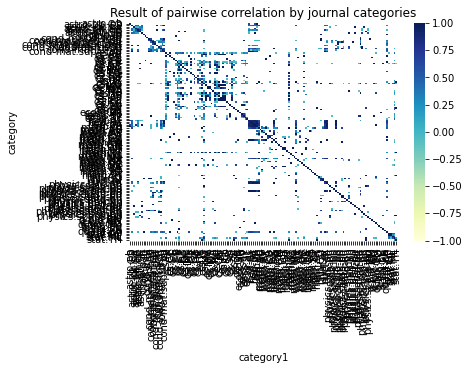

In [41]:
sim_hm = sims2.pivot('category', 'category1', 'correlation')
import seaborn as sns
sns.heatmap(sim_hm, cmap='YlGnBu',vmin=-1, vmax=1, xticklabels=True, yticklabels=True);
plt.title("Result of pairwise correlation by journal categories")

plt.show()

This appear to have a mix result of correlation. Positive value refer to positive correlation and negative value refers to negative correlation.
To make it easier to read, we will sort the value of this data frame

It appears that `Astro Physics` categories are highly correlated with
- Perfect correlation between `astro_ph` and `physics.atm-clus`, `physics.plasm-ph`, `math.GR` tells us that journals that are cited in `astro_ph` also cited in the other 3 categories.  Atomic and Molecular ClustersPlasma Physics and Math Grroup Theory.
- Positive correlation: `physics.optics`, `hep-ex`, `hep-lat`, `cond-mat.supr-con`	(Correlation pearson score > 0.9)
- Negative correlation: Math Differential Geometry and Math Number Theory are likely to not be cited along with `astro_ph` (Correlation pearson score <0), however Number Theory has stronger negative correlation (-0.777714) with `astro_ph` comparing to Differential Geometry (Pearson score -0.058222)


Enter a category (eg astro, hep, math, stat): stat
Enter another category to compare (eg astro, hep, math, stat): math


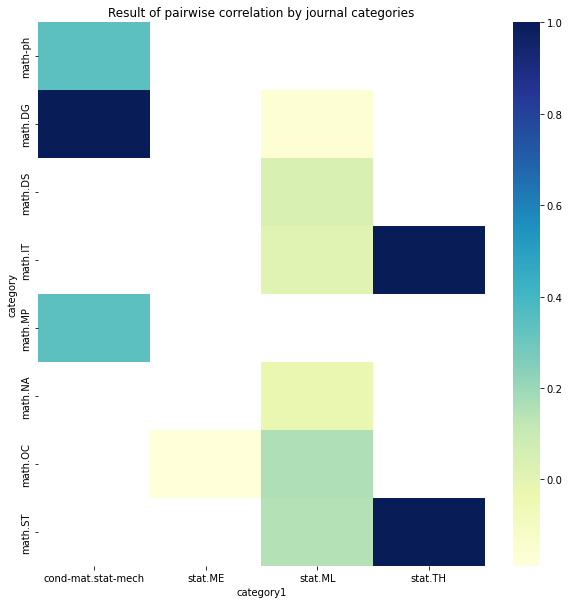

In [42]:
## Validation
## The below code takes a user input 
## Convert input to lowercase
## Return a pandas dataframe with correlation excluding self-loop
## self-loop defined as identical pairwise e.g stat.TH and stat.TH
fig, ax = plt.subplots(figsize=(10, 10))

var_cat = str(input("Enter a category (eg astro, hep, math, stat): ")).lower()
var_cat1 = str(input("Enter another category to compare (eg astro, hep, math, stat): ")).lower()
sim_val = sims2[(sims2['category1'].str.contains(var_cat)) & (sims2['category'].str.contains(var_cat1))]\
            .sort_values(by="correlation", ascending=False)
sim_hm_val = sim_val.pivot('category', 'category1', 'correlation')

sns.heatmap(sim_hm_val, cmap='YlGnBu',  xticklabels=True, yticklabels=True);
plt.title("Result of pairwise correlation by journal categories")
plt.show()


Enter a category (eg astro, hep, math, stat): math


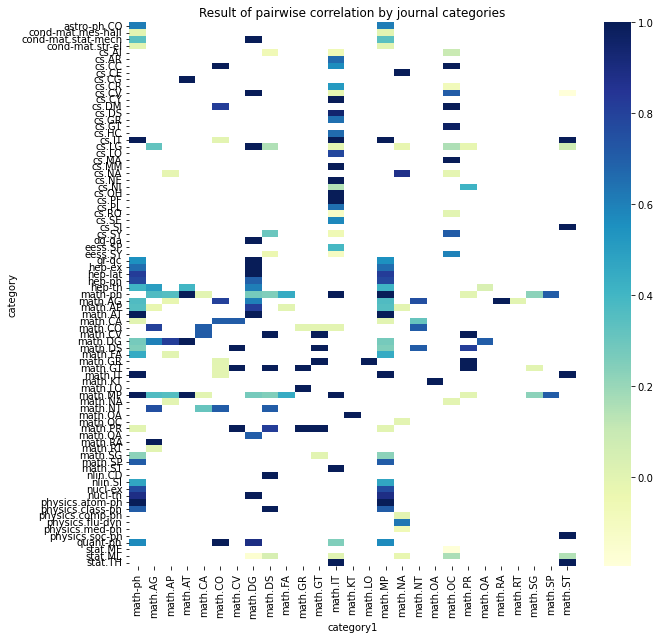

In [43]:
## Validation
## The below code takes a user input 
## Convert input to lowercase
## Return a pandas dataframe with correlation excluding self-loop
## self-loop defined as identical pairwise e.g stat.TH and stat.TH
fig, ax = plt.subplots(figsize=(10, 10))

var_cat = str(input("Enter a category (eg astro, hep, math, stat): ")).lower()
sim_val = sims2[(sims2['category1'].str.contains(var_cat)) & (sims2['category1']!=sims2['category'])]\
            .sort_values(by="correlation", ascending=False)
sim_hm_val = sim_val.pivot('category', 'category1', 'correlation')

sns.heatmap(sim_hm_val, cmap='YlGnBu',  xticklabels=True, yticklabels=True);
plt.title("Result of pairwise correlation by journal categories")
plt.show()


### Task C

In [44]:
## Load NLTK library to process text data
## tokenise each title: the process that split words to one row per one column

from nltk.tokenize import word_tokenize

## Load a list of English stop words
## Stop words describe words that don't add meaning in the phases or sentences
## In English grammar, general refer to article, pronouns, proposition etc...


from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS

## display stop words
print(text.ENGLISH_STOP_WORDS)


frozenset({'full', 'once', 'latter', 'how', 'should', 'anyhow', 'hers', 'meanwhile', 'nevertheless', 'already', 'wherein', 'i', 'two', 'beyond', 'in', 'often', 'next', 'whatever', 'found', 'mill', 'bottom', 'amount', 'became', 'other', 'becoming', 'a', 'latterly', 'call', 'something', 'could', 'onto', 'without', 'sixty', 'yourselves', 'may', 'below', 'several', 'least', 'with', 'its', 'what', 'few', 'do', 'above', 'only', 'hundred', 'anywhere', 'this', 'none', 'ltd', 'three', 'thence', 'inc', 'have', 'except', 'her', 'to', 'moreover', 'nothing', 'are', 'never', 'hasnt', 'he', 'forty', 'besides', 'behind', 'where', 'un', 'bill', 'elsewhere', 'since', 'your', 'nor', 'nobody', 'herself', 'ten', 'etc', 'then', 'almost', 'show', 'neither', 'hereupon', 'hereby', 'me', 'mostly', 'beforehand', 'was', 'all', 'we', 'there', 'around', 'themselves', 'alone', 'off', 'done', 'myself', 'whence', 'one', 'that', 'for', 'de', 'many', 'upon', 'out', 'anyway', 'the', 'than', 'together', 'nowhere', 'be', '

In [45]:
def remove_stop_words(sentence):
    word_list=sentence.split()
    clean_sentence=' '.join([w for w in word_list if w.lower() not in stop])
    return(clean_sentence)



#### Task: Tokenisation

In [46]:
df_cleaned = df[~df['journal-ref'].isna()]
len_df_cleaned = len(df_cleaned)
print(f'Filtered out missing journal ref now there are total of {len_df_cleaned:,} records.')

Filtered out missing journal ref now there are total of 650,330 records.


In [47]:
df_copy = df.copy()
df = df_cleaned.copy()

In [48]:
## create a new columns that store tokens, return a list of tokens
df['tokens'] = df.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)
df['tokens']

0          [Calculation, of, prompt, diphoton, production, cross, sections, at, Tevatron, and, LHC, energies]          
6          [Polymer, Quantum, Mechanics, and, its, Continuum, Limit]                                                   
7          [Numerical, solution, of, shock, and, ramp, compression, for, general, material, properties]                
14         [Fermionic, superstring, loop, amplitudes, in, the, pure, spinor, formalism]                                
15         [Lifetime, of, doubly, charmed, baryons]                                                                    
                             ...                                                                                       
2061355    [Topology, and, Phase, Transitions, in, the, Little-Parks, Experiment]                                      
2061357    [Extended, bound, states, and, resonances, of, two, fermions, on, a, periodic, lattice]                     
2061358    [Ginzburg-Landau-Gor'kov, The

In [49]:
## create a new columns that store description of category taxonomy

df_cat['main_cat'] = np.where(df_cat['category'].str.startswith('cs'), "Computer Science",
                             np.where(df_cat['category'].str.startswith('eess'), "Economics",
                             np.where(df_cat['category'].str.startswith('math'), "Mathematics",
                             np.where(df_cat['category'].str.startswith('q-bio'), "Quantitative Biology",
                             np.where(df_cat['category'].str.startswith('q-fin'), "Quantitative Finance",
                             np.where(df_cat['category'].str.startswith('stat'), "Statistics", "Physics"
                                     ))))))

C:\Users\NHaswell\AppData\Local\Temp\ipykernel_18320\538418747.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['main_cat'] = np.where(df_cat['category'].str.startswith('cs'), "Computer Science",


In [50]:
# An example of records

df_tokens = df.explode('tokens')
df_tokens = df_tokens[~df_tokens['journal-ref'].isna()]
df_tokens[df_tokens['id']=="0704.0001"]

,id,title,comments,journal-ref,categories,tokens
0,0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,Calculation
0,0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,of
0,0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,prompt
0,0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,diphoton
0,0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,production
0,0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,cross
0,0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,sections
0,0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,at
0,0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,Tevatron
0,0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,and


In [51]:
df_tokens = pd.merge(df_tokens, df_cat, left_on='id',
                  right_on='id',
                  how='left').set_index('id')
df_tokens.head(10)

,title,comments,journal-ref,categories,tokens,category,main_cat
id,,,,,,,
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,Calculation,hep-ph,Physics
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,Calculation,hep-ph,Physics
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,of,hep-ph,Physics
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,of,hep-ph,Physics
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,prompt,hep-ph,Physics
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,prompt,hep-ph,Physics
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,diphoton,hep-ph,Physics
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,diphoton,hep-ph,Physics
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,production,hep-ph,Physics


In [52]:
import string
#table = str.maketrans('', '', string.punctuation)

# Make token lower case
df_tokens['tokens'] = df_tokens['tokens'].str.lower()

df_tokens = df_tokens[~df_tokens['tokens'].isin(list(string.punctuation))]

# Remove punctionations
#df_tokens['tokens'] = df_tokens['tokens'].str.translate(table)
df_tokens



,title,comments,journal-ref,categories,tokens,category,main_cat
id,,,,,,,
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,calculation,hep-ph,Physics
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,calculation,hep-ph,Physics
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,of,hep-ph,Physics
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,of,hep-ph,Physics
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,prompt,hep-ph,Physics
...,...,...,...,...,...,...,...
supr-con/9609004,Ginzburg Landau theory for d-wave pairing and fourfold symmetric vortex\n core structure,"12 pages including 8 eps figs, LaTeX with jpsj.sty & epsfig","J. Phys. Soc. Jpn. 66, 204 (1997).",supr-con cond-mat.supr-con,vortex,cond-mat.supr-con,Physics
supr-con/9609004,Ginzburg Landau theory for d-wave pairing and fourfold symmetric vortex\n core structure,"12 pages including 8 eps figs, LaTeX with jpsj.sty & epsfig","J. Phys. Soc. Jpn. 66, 204 (1997).",supr-con cond-mat.supr-con,core,supr-con,Physics
supr-con/9609004,Ginzburg Landau theory for d-wave pairing and fourfold symmetric vortex\n core structure,"12 pages including 8 eps figs, LaTeX with jpsj.sty & epsfig","J. Phys. Soc. Jpn. 66, 204 (1997).",supr-con cond-mat.supr-con,core,cond-mat.supr-con,Physics


In [53]:
## Remove non alphabetic tokens

df_tokens['dumy_bool']= df_tokens["tokens"].str.isalpha()
cnt_non_alpha = len(df_tokens[df_tokens['dumy_bool']!=True])
df_tokens = df_tokens[df_tokens['dumy_bool']==True]
print(f'Removed {cnt_non_alpha:,} from the dataset for non alphabetic words')

#remove dummy columns
df_tokens.drop('dumy_bool', axis=1, inplace=True)

Removed 1,341,598 from the dataset for non alphabetic words


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [54]:
## check if special characters still exist
len_punct = len(df_tokens[df_tokens['tokens'].isin(list(string.punctuation))])
print(f'Total number of tokens with special characters: {len_punct}')

Total number of tokens with special characters: 0


In [55]:
df_tokens.head(6)

,title,comments,journal-ref,categories,tokens,category,main_cat
id,,,,,,,
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,calculation,hep-ph,Physics
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,calculation,hep-ph,Physics
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,of,hep-ph,Physics
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,of,hep-ph,Physics
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,prompt,hep-ph,Physics
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,prompt,hep-ph,Physics


In [56]:
## Cleaning journal reference 
## remove newline \n from text
## remove quote at the start of the text
## remove leading / trailing whitespace

df_tokens['journal-ref'] = df_tokens['journal-ref'].replace(r'\n','', regex=True) 
df_tokens['journal-ref'] = df_tokens['journal-ref'].str.replace(r"\(.*\)","")
df_tokens['journal-ref'] = df_tokens['journal-ref'].str.strip()

C:\Users\NHaswell\AppData\Local\Temp\ipykernel_18320\2616418069.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tokens['journal-ref'] = df_tokens['journal-ref'].replace(r'\n','', regex=True)
C:\Users\NHaswell\AppData\Local\Temp\ipykernel_18320\2616418069.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df_tokens['journal-ref'] = df_tokens['journal-ref'].str.replace(r"\(.*\)","")
C:\Users\NHaswell\AppData\Local\Temp\ipykernel_18320\2616418069.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [57]:
df_tokens[df_tokens['journal-ref'].str.startswith("\*")]

,title,comments,journal-ref,categories,tokens,category,main_cat
id,,,,,,,


In [58]:
df_tokens['journal-ref'].str.strip()

id
0704.0001           Phys.Rev.D76:013009,2007    
0704.0001           Phys.Rev.D76:013009,2007    
0704.0001           Phys.Rev.D76:013009,2007    
0704.0001           Phys.Rev.D76:013009,2007    
0704.0001           Phys.Rev.D76:013009,2007    
                              ...               
supr-con/9609004    J. Phys. Soc. Jpn. 66, 204 .
supr-con/9609004    J. Phys. Soc. Jpn. 66, 204 .
supr-con/9609004    J. Phys. Soc. Jpn. 66, 204 .
supr-con/9609004    J. Phys. Soc. Jpn. 66, 204 .
supr-con/9609004    J. Phys. Soc. Jpn. 66, 204 .
Name: journal-ref, Length: 13041839, dtype: object

### Word frequencies

In [59]:
df_tokens['tokens'] = df_tokens['tokens'].str.lower()
df_tokens = df_tokens[~df_tokens['tokens'].isin(stop)]


C:\Users\NHaswell\AppData\Local\Temp\ipykernel_18320\1377296028.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tokens['tokens'] = df_tokens['tokens'].str.lower()


In [60]:
word_count = df_tokens.groupby(['journal-ref','tokens']).size().reset_index(name="Count")
word_count_top50 = df_tokens.groupby(['journal-ref','tokens']).size().nlargest(50).reset_index(name="Count")


In [61]:
### Create a new dataframe for top 10 most frequently used words
word_count_top10 = df_tokens.groupby(['tokens']).size().nlargest(10).reset_index(name="Count")
word_count_top10

,tokens,Count
0,quantum,124659
1,model,76811
2,theory,59197
3,field,44538
4,systems,39834
5,models,36849
6,magnetic,34852
7,spin,34756
8,phase,33870
9,energy,33708


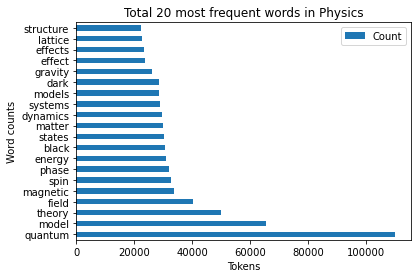

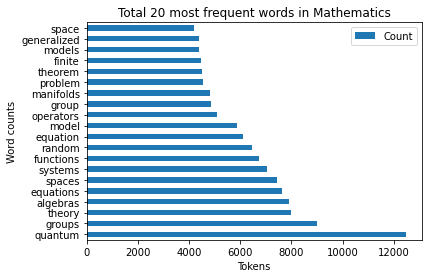

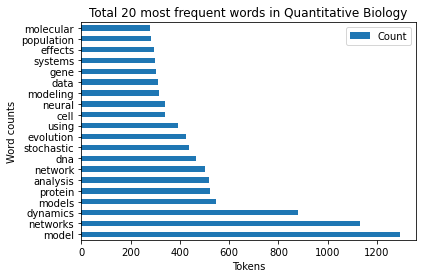

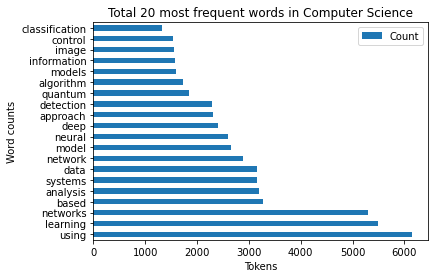

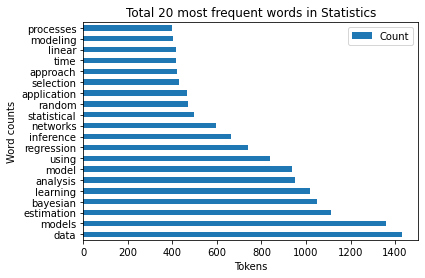

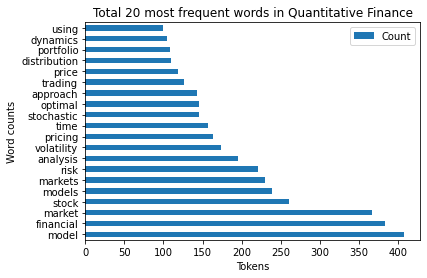

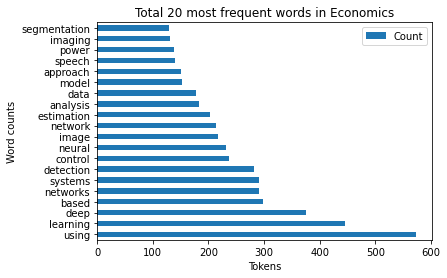

In [62]:
## loop through main category
## Then plot top 10 tokens by each category
for cat in df_tokens.main_cat.unique():
    #print("category: ", cat)
    temp = df_tokens[df_tokens['main_cat']==cat]\
        .groupby(['main_cat','tokens']).size().nlargest(20).reset_index(name="Count")
    temp = temp.sort_values(by="Count", ascending=False)
    ax = temp.plot.barh(x='tokens', y='Count')
    ax.set_title("Total 20 most frequent words in " + str(cat))
    ax.set_xlabel("Tokens")
    ax.set_ylabel("Word counts")
    

In [63]:
df_tokens.head(1)
#nlargest(50)

,title,comments,journal-ref,categories,tokens,category,main_cat
id,,,,,,,
0704.0001,Calculation of prompt diphoton production cross sections at Tevatron and\n LHC energies,"37 pages, 15 figures; published version","Phys.Rev.D76:013009,2007",hep-ph,calculation,hep-ph,Physics


In [64]:
## Create two new dataframes
## word_count_by_cat_tokens group "token" and "main category", then count total of rows by each combination
## word_count_by gr
word_count_by_cat_tokens = df_tokens.groupby(['tokens','main_cat']).size().reset_index(name="Count")
word_count_by_cat = df_tokens.groupby(['main_cat']).size().reset_index(name="Count")

print(word_count_by_cat_tokens.head(5))
print(word_count_by_cat.head(5))

  tokens          main_cat  Count
0  aa     Computer Science  2    
1  aa     Physics           177  
2  aaa    Physics           2    
3  aab    Computer Science  2    
4  aab    Physics           2    
               main_cat    Count
0  Computer Science      449593 
1  Economics             29228  
2  Mathematics           1190748
3  Physics               7222159
4  Quantitative Biology  81050  


In [65]:
df_combined = pd.merge(word_count_by_cat_tokens,word_count_by_cat, left_on='main_cat',
                  right_on='main_cat',
                  how='left').rename(columns={"Count_x": "count_words", "Count_y": "words_in_doc"})
df_combined['prop'] = df_combined['count_words'] / df_combined['words_in_doc']



In [66]:
df_combined.head(2)

,tokens,main_cat,count_words,words_in_doc,prop
0,aa,Computer Science,2,449593,0.00000
1,aa,Physics,177,7222159,0.00002


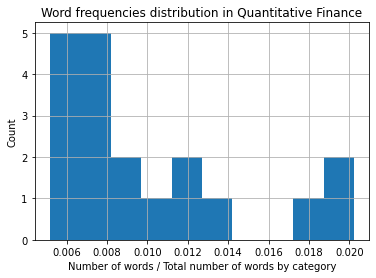

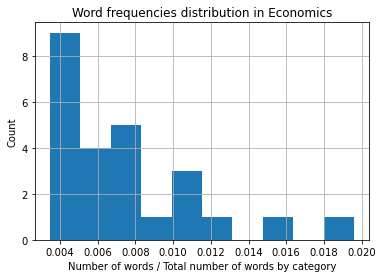

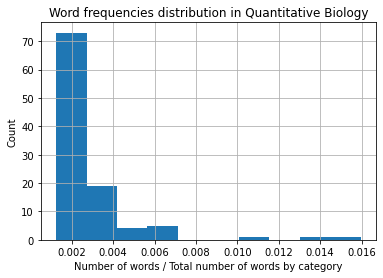

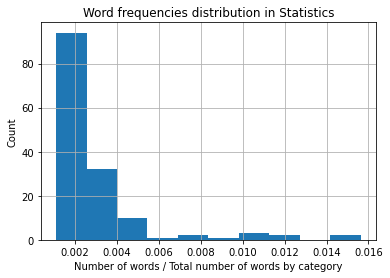

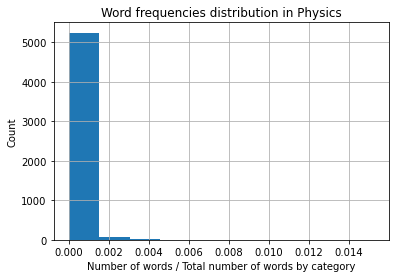

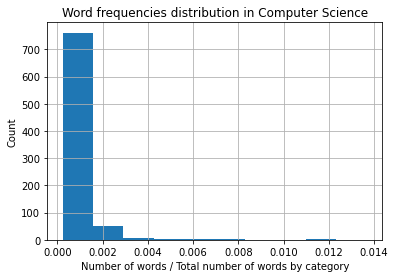

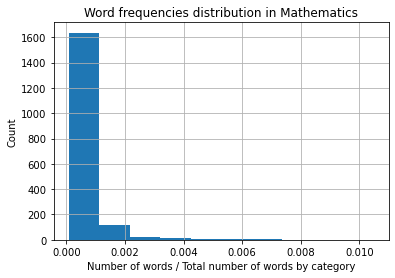

In [67]:
df_comb1 = df_combined[df_combined['count_words']>100].sort_values("prop", ascending=False)
for comb in df_comb1.main_cat.unique():
    df_comb1[df_comb1['main_cat']==comb]['prop'].hist()
    plt.title("Word frequencies distribution in " + str(comb))
    plt.xlabel("Number of words / Total number of words by category")
    plt.ylabel("Count")
    plt.show()
                                

In [68]:
word_count_by_cat_tokens.main_cat.unique()

array(['Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Economics', 'Quantitative Finance'],
      dtype=object)

In [69]:
#word_count['journal-ref'] = word_count['journal-ref'].replace(r'\n','', regex=True) 
# word count by journal
journal_word_total = word_count.groupby(['journal-ref']).sum().reset_index().sort_values(by="Count", ascending=False)

In [70]:
mean = sum(word_count_top50['Count'])/len(word_count_top50['Count'])
standard_d =  np.std(word_count_top50['Count'])

word_count_top50['normalised_count'] = np.log(word_count_top50['Count'])

In [71]:
word_count_top50.head(1)

,journal-ref,tokens,Count,normalised_count
0,Prog Theor Exp Phys,model,93,4.53260


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


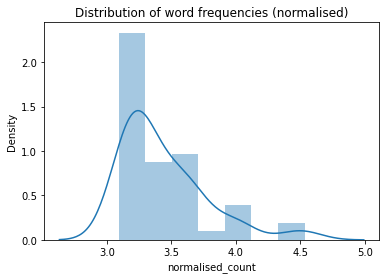

In [72]:
import seaborn as sns
sns.distplot(word_count_top50['normalised_count']).set_title('Distribution of word frequencies (normalised)');


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


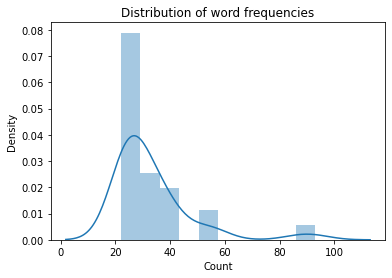

In [73]:
sns.distplot(word_count_top50['Count']).set_title('Distribution of word frequencies');


In [74]:
word_count_top50.head(3)

,journal-ref,tokens,Count,normalised_count
0,Prog Theor Exp Phys,model,93,4.53260
1,Ann. Phys.,quantum,87,4.46591
2,IEEE Transactions on Information Theory,quantum,56,4.02535


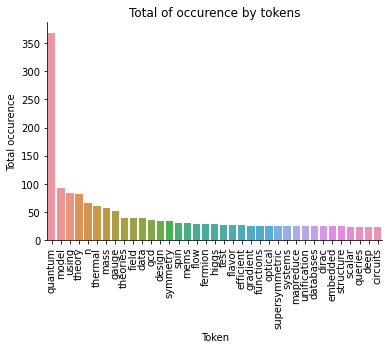

In [75]:
## Top 50 word counts in the dataset
word_count_top50_a =word_count_top50.groupby('tokens').sum('Count').drop("normalised_count", axis=1).reset_index()
word_count_top50_a = word_count_top50_a.sort_values(by="Count", ascending=False)
sns.barplot(x="tokens", y="Count",data=word_count_top50_a, ci=None)
plt.title('Total of occurence by tokens')
plt.xlabel('Token')
plt.ylabel('Total occurence')
plt.xticks(rotation=90)
sns.despine()
plt.show()


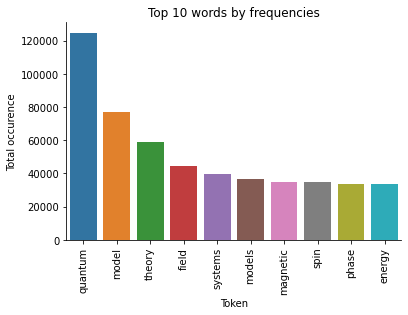

In [76]:
## Top 10 word counts in the dataset
word_count_top10_a =word_count_top10.groupby('tokens').sum('Count').reset_index()
word_count_top10_a = word_count_top10_a.sort_values(by="Count", ascending=False)
sns.barplot(x="tokens", y="Count",data=word_count_top10_a, ci=None)
plt.title('Top 10 words by frequencies')
plt.xlabel('Token')
plt.ylabel('Total occurence')
plt.xticks(rotation=90)
sns.despine()
plt.show()


In [77]:
word_count_top10_a

,tokens,Count
6,quantum,124659
3,model,76811
9,theory,59197
1,field,44538
8,systems,39834
4,models,36849
2,magnetic,34852
7,spin,34756
5,phase,33870
0,energy,33708


In [78]:
for word in word_count_top10_a.tokens:
    s = word_count[word_count['tokens']==word].sort_values(by="Count", ascending=False)['journal-ref'].iloc[0]
    print(f'Suggested journal for keyword {word} is {s}')


Suggested journal for keyword quantum is Ann. Phys.
Suggested journal for keyword model is Prog Theor Exp Phys
Suggested journal for keyword theory is Prog Theor Exp Phys
Suggested journal for keyword field is Prog Theor Exp Phys
Suggested journal for keyword systems is Ann. Phys.
Suggested journal for keyword models is Prog Theor Exp Phys
Suggested journal for keyword magnetic is Prog Theor Exp Phys
Suggested journal for keyword spin is Ann. Phys.
Suggested journal for keyword phase is Ann. Phys.
Suggested journal for keyword energy is Prog Theor Exp Phys


In [79]:
## Diagnostic Tools: 
## 
## Enter word token from top 50 above
## This test will use the word: theory
## Standardise the user input by converting it to lowercase 

sel_word = str(input("Enter a single word search: \n")).lower()
result = word_count_top50.loc[word_count_top50[word_count_top50['tokens']==sel_word].index][['journal-ref','Count']]
result = result.sort_values(by="Count", ascending=False).iloc[0][0]

result


Enter a single word search: 
model


'Prog Theor Exp Phys'

In [80]:

sel_word = str(input("Enter a single word search: \n")).lower()
result = word_count_top50.loc[word_count_top50[word_count_top50['tokens']==sel_word].index][['journal-ref','Count']]
result

Enter a single word search: 
 k


,journal-ref,Count


In [81]:
result = result.sort_values(by="Count", ascending=False)
result['rank'] = np.arange(len(result))+1
result

,journal-ref,Count,rank


In [82]:
##  Validating the result
df_tokens[(df_tokens['journal-ref'].str.contains('Prog Theor Exp Phys')) & \
          (df_tokens['title'].str.contains(sel_word))]

,title,comments,journal-ref,categories,tokens,category,main_cat
id,,,,,,,
1701.06748,Heat kernel approach to relations between covariant and consistent\n currents in chiral gauge theories,"22pages, no figures",Prog Theor Exp Phys,hep-th,heat,hep-th,Physics
1701.06748,Heat kernel approach to relations between covariant and consistent\n currents in chiral gauge theories,"22pages, no figures",Prog Theor Exp Phys,hep-th,heat,hep-th,Physics
1701.06748,Heat kernel approach to relations between covariant and consistent\n currents in chiral gauge theories,"22pages, no figures",Prog Theor Exp Phys,hep-th,kernel,hep-th,Physics
1701.06748,Heat kernel approach to relations between covariant and consistent\n currents in chiral gauge theories,"22pages, no figures",Prog Theor Exp Phys,hep-th,kernel,hep-th,Physics
1701.06748,Heat kernel approach to relations between covariant and consistent\n currents in chiral gauge theories,"22pages, no figures",Prog Theor Exp Phys,hep-th,approach,hep-th,Physics
...,...,...,...,...,...,...,...
2110.00127,Characterization of two-level system noise for microwave kinetic\n inductance detector comprising niobium film on silicon substrate,"14 pages, 12 figures",Prog Theor Exp Phys,physics.ins-det,film,physics.ins-det,Physics
2110.00127,Characterization of two-level system noise for microwave kinetic\n inductance detector comprising niobium film on silicon substrate,"14 pages, 12 figures",Prog Theor Exp Phys,physics.ins-det,silicon,physics.ins-det,Physics
2110.00127,Characterization of two-level system noise for microwave kinetic\n inductance detector comprising niobium film on silicon substrate,"14 pages, 12 figures",Prog Theor Exp Phys,physics.ins-det,silicon,physics.ins-det,Physics


### Interactive Tool

In [111]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

pio.templates.default = "plotly_white"

sims4 =sims2[sims2['category1'].str.contains("phy")]
heat = go.Heatmap(
    z=sims4['correlation'],
    x=sims4['category'],
    y=sims4['category1'],
    colorscale=px.colors.diverging.RdBu,
    zmin=-1,
    zmax=1
)

fig=go.Figure(data=[heat])
fig.show()